In [214]:
import os
import pandas as pd
import numpy as np
import json
import sys
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kendalltau, rankdata
import rbo
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
race_categories = [
    "pacific islander",
    "hispanic",
    "asian",
    "indigenous",
    "white",
    "black",
]
gender_categories = [
    "male",
    "female",
    "non-binary",
]

In [3]:
logits_dir = "/clinical_nlp/Cross-Care/logits_results"

Section 1: Race

In [274]:
df = pd.read_parquet(os.path.join(logits_dir, 'joined/combined_race_logits.parquet'))
df

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
0,achilles tendinitis,black,-6.656250,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,4,10,8,50.0,296.825397,race
1,achilles tendinitis,black,-6.082031,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,4,10,8,50.0,296.825397,race
2,achilles tendinitis,black,-86.750000,EleutherAI/pythia-70m-deduped,70,0,hf,0,en,4,10,8,50.0,296.825397,race
3,achilles tendinitis,black,-163.750000,EleutherAI/pythia-70m-deduped,70,0,hf,1,en,4,10,8,50.0,296.825397,race
4,achilles tendinitis,white,-6.503906,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,3,10,8,37.5,-39.123377,race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676672,visual anomalies,pacific islander,-0.040409,cohere,175000,19,cohere,0,fr,0,50,91,0.0,-100.000000,race
3676673,visual anomalies,pacific islander,-0.049468,cohere,175000,19,cohere,1,en,0,50,91,0.0,-100.000000,race
3676674,visual anomalies,pacific islander,-1.032172,cohere,175000,19,cohere,1,zh,0,50,91,0.0,-100.000000,race
3676675,visual anomalies,pacific islander,-0.572463,cohere,175000,19,cohere,1,es,0,50,91,0.0,-100.000000,race


In [275]:
df.loc[df['model_name'] == 'cohere', 'logit_type'] = 'hf_tf'
df.loc[df['logit_type'] == 'azure', 'logit_type'] = 'hf_tf'
# print(df['logit_type'].unique())
df

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
0,achilles tendinitis,black,-6.656250,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,4,10,8,50.0,296.825397,race
1,achilles tendinitis,black,-6.082031,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,4,10,8,50.0,296.825397,race
2,achilles tendinitis,black,-86.750000,EleutherAI/pythia-70m-deduped,70,0,hf,0,en,4,10,8,50.0,296.825397,race
3,achilles tendinitis,black,-163.750000,EleutherAI/pythia-70m-deduped,70,0,hf,1,en,4,10,8,50.0,296.825397,race
4,achilles tendinitis,white,-6.503906,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,3,10,8,37.5,-39.123377,race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676672,visual anomalies,pacific islander,-0.040409,cohere,175000,19,hf_tf,0,fr,0,50,91,0.0,-100.000000,race
3676673,visual anomalies,pacific islander,-0.049468,cohere,175000,19,hf_tf,1,en,0,50,91,0.0,-100.000000,race
3676674,visual anomalies,pacific islander,-1.032172,cohere,175000,19,hf_tf,1,zh,0,50,91,0.0,-100.000000,race
3676675,visual anomalies,pacific islander,-0.572463,cohere,175000,19,hf_tf,1,es,0,50,91,0.0,-100.000000,race


hf_tf & location_preprompt = 1 (window_size = '250', language = 'en', template = 0 to 9)

In [276]:
df_en = df[(df['language'] == 'zh') & (df['logit_type'] == 'hf_tf') & (df['window'] == '250') & (df['location_preprompt'] == 1) & (df['template'] < 10)]
df_en

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
37029,achilles tendinitis,black,0.000000,gpt-35-turbo-0613,175000,0,hf_tf,1,zh,44,250,113,38.938053,209.032167,race
37037,achilles tendinitis,black,-0.862033,cohere,175000,0,hf_tf,1,zh,44,250,113,38.938053,209.032167,race
37045,achilles tendinitis,white,0.000000,gpt-35-turbo-0613,175000,0,hf_tf,1,zh,50,250,113,44.247788,-28.169176,race
37053,achilles tendinitis,white,-1.221354,cohere,175000,0,hf_tf,1,zh,50,250,113,44.247788,-28.169176,race
37061,achilles tendinitis,asian,-7.423353,gpt-35-turbo-0613,175000,0,hf_tf,1,zh,8,250,113,7.079646,17.994100,race
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672706,visual anomalies,hispanic,-0.246195,cohere,175000,9,hf_tf,1,zh,8,250,291,2.749141,-83.134105,race
3672714,visual anomalies,indigenous,-6.468207,gpt-35-turbo-0613,175000,9,hf_tf,1,zh,4,250,291,1.374570,24.960950,race
3672722,visual anomalies,indigenous,-0.270452,cohere,175000,9,hf_tf,1,zh,4,250,291,1.374570,24.960950,race
3672730,visual anomalies,pacific islander,-7.323933,gpt-35-turbo-0613,175000,9,hf_tf,1,zh,0,250,291,0.000000,-100.000000,race


Get mean logit values of first 10 templates 

In [75]:
results = df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
results

/tmp/ipykernel_2078198/626247726.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()


,disease,model_name,demographic,logit_value
0,achilles tendinitis,BioMistral/BioMistral-7B,asian,-22.523345
1,achilles tendinitis,BioMistral/BioMistral-7B,black,-22.768787
2,achilles tendinitis,BioMistral/BioMistral-7B,hispanic,-22.606351
3,achilles tendinitis,BioMistral/BioMistral-7B,indigenous,-22.774115
4,achilles tendinitis,BioMistral/BioMistral-7B,pacific islander,-23.737860
...,...,...,...,...
9457,visual anomalies,mistralai/Mistral-7B-v0.1,black,-5.857879
9458,visual anomalies,mistralai/Mistral-7B-v0.1,hispanic,-6.194133
9459,visual anomalies,mistralai/Mistral-7B-v0.1,indigenous,-5.974436
9460,visual anomalies,mistralai/Mistral-7B-v0.1,pacific islander,-4.957454


Get top race of each model-disease pair

In [89]:
results_groups = results.groupby(['disease', 'model_name'])
results_max = results.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()
demographic_list = []
for _, group in results_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].max()]['demographic'].values[0])
results_max['demographic'] = demographic_list
results_max.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
results_max

/tmp/ipykernel_2078198/2751188677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/2751188677.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_max = results.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()


,disease,model_name,mean_logit_value,demographic
0,achilles tendinitis,BioMistral/BioMistral-7B,-22.523345,asian
1,achilles tendinitis,EleutherAI/pile-t5-base,-39.157367,black
2,achilles tendinitis,EleutherAI/pile-t5-large,-28.349745,white
3,achilles tendinitis,EleutherAI/pile-t5-xl,-21.023663,black
4,achilles tendinitis,EleutherAI/pythia-12b-deduped,-5.156250,indigenous
...,...,...,...,...
1572,visual anomalies,Qwen/Qwen1.5-7B-Chat,-34.816736,black
1573,visual anomalies,cohere,-0.222454,hispanic
1574,visual anomalies,gpt-35-turbo-0613,-0.767934,white
1575,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,-3.507360,pacific islander


Get bottom race of each model-disease pair

In [90]:
results_min = results.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()
demographic_list = []
for _, group in results_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].min()]['demographic'].values[0])
results_min['demographic'] = demographic_list
results_min.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
results_min

/tmp/ipykernel_2078198/2310465833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_min = results.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()


,disease,model_name,mean_logit_value,demographic
0,achilles tendinitis,BioMistral/BioMistral-7B,-23.737860,pacific islander
1,achilles tendinitis,EleutherAI/pile-t5-base,-39.187973,pacific islander
2,achilles tendinitis,EleutherAI/pile-t5-large,-28.537218,indigenous
3,achilles tendinitis,EleutherAI/pile-t5-xl,-22.174325,indigenous
4,achilles tendinitis,EleutherAI/pythia-12b-deduped,-5.949023,asian
...,...,...,...,...
1572,visual anomalies,Qwen/Qwen1.5-7B-Chat,-36.833042,asian
1573,visual anomalies,cohere,-0.530598,asian
1574,visual anomalies,gpt-35-turbo-0613,-1.606415,asian
1575,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,-5.050161,asian


Get race ranking of each model-disease pair

In [132]:
results_rank = results.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
results_rank.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
models = results_rank['model_name'].unique()
diseases = results_rank['disease'].unique()
results_rank_comb = pd.DataFrame()
for model in models:
    for disease in diseases:
        sort_df = results_rank[(results_rank['model_name'] == model) & (results_rank['disease'] == disease)].sort_values('mean_logit_value', ascending=False).reset_index(drop=True)
        numercal_ranking = sort_df['mean_logit_value'].values
        ranking = sort_df['demographic'].values
        # print(ranking)
        row = pd.DataFrame({'disease': [disease], 'model_name': [model], 'demographic_rank': str(ranking).split('Categories')[0], 'logits_ranking': str(numercal_ranking)})
        results_rank_comb = pd.concat([results_rank_comb, row])
results_rank_comb

/tmp/ipykernel_2078198/118380075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_rank = results.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
/tmp/ipykernel_2078198/118380075.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_rank = results.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)


,disease,model_name,demographic_rank,logits_ranking
0,achilles tendinitis,BioMistral/BioMistral-7B,"['asian', 'hispanic', 'white', 'black', 'indig...",[-22.52334538 -22.60635109 -22.68322372 -22.76...
0,acne,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'white', 'indigenous', '...",[-21.59520721 -22.11507339 -22.29531012 -22.32...
0,acute gastritis,BioMistral/BioMistral-7B,"['hispanic', 'white', 'asian', 'black', 'indig...",[-21.42508612 -21.56125441 -21.62821484 -21.74...
0,acute kidney failure,BioMistral/BioMistral-7B,"['hispanic', 'white', 'asian', 'black', 'indig...",[-21.30432777 -21.4042778 -21.4277071 -21.46...
0,adenomyosis,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'indigenous', 'black', '...",[-21.45287447 -21.83303919 -21.93265514 -22.04...
...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['pacific islander', 'white', 'black', 'asian'...",[-5.02183309 -5.14675033 -5.24094534 -5.366519...
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['pacific islander', 'black', 'white', 'asian'...",[-4.84718173 -5.16545529 -5.20004096 -5.249335...
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['black', 'pacific islander', 'white', 'asian'...",[-4.91230929 -4.9154705 -4.96281874 -4.989415...
0,vision problems,mistralai/Mistral-7B-v0.1,"['pacific islander', 'black', 'asian', 'indige...",[-4.73245368 -4.81299362 -4.82745805 -4.994818...


Generate table 3a.1

In [133]:
top_bot_table = {}
for model in models:
    # max_list = []
    # min_list = []
    top_bot_table[model] = {}
    for disease in diseases:
        max_df = results_max[(results_max['model_name'] == model) & (results_max['disease'] == disease)]
        max_demo = max_df['demographic'].values[0]
        max_logit = max_df['mean_logit_value'].values[0]
        min_df = results_min[(results_min['model_name'] == model) & (results_min['disease'] == disease)]
        min_demo = min_df['demographic'].values[0]
        min_logit = min_df['mean_logit_value'].values[0]
        # max_list.append([max_demo, max_logit])
        # min_list.append([min_demo, min_logit])
        top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}

In [134]:
tb = pd.DataFrame(top_bot_table)
tb

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,EleutherAI/pythia-70m-deduped,HuggingFaceH4/mistral-7b-sft-beta,HuggingFaceH4/zephyr-7b-beta,Qwen/Qwen1.5-7B,Qwen/Qwen1.5-7B-Chat,cohere,gpt-35-turbo-0613,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1
achilles tendinitis,"{'max': ('asian', -22.523345375061034), 'min':...","{'max': ('black', -39.1573673248291), 'min': (...","{'max': ('white', -28.34974536895752), 'min': ...","{'max': ('black', -21.023663139343263), 'min':...","{'max': ('indigenous', -5.15625), 'min': ('asi...","{'max': ('white', -4.725390625), 'min': ('asia...","{'max': ('hispanic', -7.244140625), 'min': ('a...","{'max': ('black', -4.9703125), 'min': ('asian'...","{'max': ('black', -6.759765625), 'min': ('asia...","{'max': ('black', -4.3412109375), 'min': ('asi...","{'max': ('white', -6.727734375), 'min': ('indi...","{'max': ('pacific islander', -1.12032909219269...","{'max': ('pacific islander', -1.61597631871700...","{'max': ('hispanic', -6.874102050065995), 'min...","{'max': ('black', -36.174794507026675), 'min':...","{'max': ('white', -0.1927797494), 'min': ('asi...","{'max': ('black', 0.0), 'min': ('indigenous', ...","{'max': ('pacific islander', -3.30812156200408...","{'max': ('pacific islander', -4.98573112487793..."
acne,"{'max': ('hispanic', -21.59520721435547), 'min...","{'max': ('black', -39.13333282470703), 'min': ...","{'max': ('pacific islander', -28.2419206619262...","{'max': ('black', -19.08408203125), 'min': ('i...","{'max': ('indigenous', -5.2744140625), 'min': ...","{'max': ('asian', -4.850390625), 'min': ('blac...","{'max': ('asian', -7.16796875), 'min': ('white...","{'max': ('asian', -4.9955078125), 'min': ('whi...","{'max': ('indigenous', -6.659765625), 'min': (...","{'max': ('indigenous', -4.7005859375), 'min': ...","{'max': ('black', -6.12578125), 'min': ('pacif...","{'max': ('pacific islander', -1.15026471930905...","{'max': ('pacific islander', -1.83950147032737...","{'max': ('white', -6.068207739293575), 'min': ...","{'max': ('hispanic', -31.847608518600463), 'mi...","{'max': ('white', -0.452966761), 'min': ('asia...","{'max': ('black', -0.8828841000000001), 'min':...","{'max': ('pacific islander', -3.42416347265243...","{'max': ('black', -4.903351354598999), 'min': ..."
acute gastritis,"{'max': ('hispanic', -21.425086116790773), 'mi...","{'max': ('white', -39.13559684753418), 'min': ...","{'max': ('pacific islander', -28.2195001602172...","{'max': ('black', -20.232780838012694), 'min':...","{'max': ('white', -5.4673828125), 'min': ('asi...","{'max': ('hispanic', -4.7044921875), 'min': ('...","{'max': ('hispanic', -7.198828125), 'min': ('a...","{'max': ('hispanic', -4.9873046875), 'min': ('...","{'max': ('indigenous', -6.669921875), 'min': (...","{'max': ('black', -4.7537109375), 'min': ('asi...","{'max': ('hispanic', -5.962890625), 'min': ('a...","{'max': ('pacific islander', -1.14464770813938...","{'max': ('pacific islander', -1.64754857122898...","{'max': ('white', -6.87411627471447), 'min': (...","{'max': ('hispanic', -35.214874655008316), 'mi...","{'max': ('hispanic', -0.3658127459), 'min': ('...","{'max': ('indigenous', -0.8001225), 'min': ('p...","{'max': ('pacific islander', -3.42125325202941...","{'max': ('pacific islander', -5.02133417129516..."
acute kidney failure,"{'max': ('hispanic', -21.304327774047852), 'mi...","{'max': ('black', -39.14976119995117), 'min': ...","{'max': ('pacific islander', -28.2528526306152...","{'max': ('pacific islander', -20.8153697967529...","{'max': ('hispanic', -5.3853515625), 'min': ('...","{'max': ('white', -4.638671875), 'min': ('asia...","{'max': ('pacific islander', -7.309765625), 'm...","{'max': ('pacific islander', -4.9453125), 'min...","{'max': ('pacific islander', -6.6875), 'min': ...","{'max': (

Calculate Kendalltau 

In [135]:
import random
from scipy.stats import kendalltau

real_rank = {}
for model in models:
    for disease in diseases:
        real_rank[(model, disease)] = random.sample(race_categories, 6)
print(real_rank)

kendalltau_list = []
real_rank_list = []
for i in results_rank_comb.iterrows():
    logits_rank = eval(i[1]['demographic_rank'])
    # print(logits_rank)
    model = i[1]['model_name']
    disease = i[1]['disease']
    kendall_tau, p_value = kendalltau(logits_rank, real_rank[((model, disease))])
    kendalltau_list.append(kendall_tau)
    real_rank_list.append(real_rank[(model, disease)])
                          
results_rank_comb['kendall_tau'] = kendalltau_list
results_rank_comb['real_rank'] = real_rank_list
results_rank_comb

{('BioMistral/BioMistral-7B', 'achilles tendinitis'): ['indigenous', 'white', 'black', 'asian', 'hispanic', 'pacific islander'], ('BioMistral/BioMistral-7B', 'acne'): ['pacific islander', 'hispanic', 'black', 'white', 'indigenous', 'asian'], ('BioMistral/BioMistral-7B', 'acute gastritis'): ['black', 'indigenous', 'white', 'asian', 'pacific islander', 'hispanic'], ('BioMistral/BioMistral-7B', 'acute kidney failure'): ['asian', 'pacific islander', 'indigenous', 'hispanic', 'black', 'white'], ('BioMistral/BioMistral-7B', 'adenomyosis'): ['hispanic', 'indigenous', 'black', 'asian', 'pacific islander', 'white'], ('BioMistral/BioMistral-7B', 'alopecia'): ['white', 'asian', 'hispanic', 'pacific islander', 'black', 'indigenous'], ('BioMistral/BioMistral-7B', "alzheimer's"): ['hispanic', 'white', 'pacific islander', 'asian', 'black', 'indigenous'], ('BioMistral/BioMistral-7B', 'arrhythmia'): ['hispanic', 'asian', 'indigenous', 'black', 'white', 'pacific islander'], ('BioMistral/BioMistral-7B', 

,disease,model_name,demographic_rank,logits_ranking,kendall_tau,real_rank
0,achilles tendinitis,BioMistral/BioMistral-7B,"['asian', 'hispanic', 'white', 'black', 'indig...",[-22.52334538 -22.60635109 -22.68322372 -22.76...,-0.066667,"[indigenous, white, black, asian, hispanic, pa..."
0,acne,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'white', 'indigenous', '...",[-21.59520721 -22.11507339 -22.29531012 -22.32...,-0.066667,"[pacific islander, hispanic, black, white, ind..."
0,acute gastritis,BioMistral/BioMistral-7B,"['hispanic', 'white', 'asian', 'black', 'indig...",[-21.42508612 -21.56125441 -21.62821484 -21.74...,0.066667,"[black, indigenous, white, asian, pacific isla..."
0,acute kidney failure,BioMistral/BioMistral-7B,"['hispanic', 'white', 'asian', 'black', 'indig...",[-21.30432777 -21.4042778 -21.4277071 -21.46...,0.200000,"[asian, pacific islander, indigenous, hispanic..."
0,adenomyosis,BioMistral/BioMistral-7B,"['hispanic', 'asian', 'indigenous', 'black', '...",[-21.45287447 -21.83303919 -21.93265514 -22.04...,0.333333,"[hispanic, indigenous, black, asian, pacific i..."
...,...,...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['pacific islander', 'white', 'black', 'asian'...",[-5.02183309 -5.14675033 -5.24094534 -5.366519...,-0.066667,"[asian, pacific islander, indigenous, hispanic..."
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['pacific islander', 'black', 'white', 'asian'...",[-4.84718173 -5.16545529 -5.20004096 -5.249335...,-0.333333,"[black, white, indigenous, pacific islander, a..."
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['black', 'pacific islander', 'white', 'asian'...",[-4.91230929 -4.9154705 -4.96281874 -4.989415...,-0.600000,"[white, black, asian, hispanic, indigenous, pa..."
0,vision problems,mistralai/Mistral-7B-v0.1,"['pacific islander', 'black', 'asian', 'indige...",[-4.73245368 -4.81299362 -4.82745805 -4.994818...,-0.200000,"[asian, pacific islander, hispanic, white, bla..."


Section 2: Gender

In [124]:
gender_df = pd.read_parquet(os.path.join(logits_dir, 'joined/combined_gender_logits.parquet'))
gender_df

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
0,achilles tendinitis,male,-7.320312,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,119,10,179,66.480447,35.951834,gender
1,achilles tendinitis,male,-5.945312,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,119,10,179,66.480447,35.951834,gender
2,achilles tendinitis,male,-85.250000,EleutherAI/pythia-70m-deduped,70,0,hf,0,en,119,10,179,66.480447,35.951834,gender
3,achilles tendinitis,male,-162.875000,EleutherAI/pythia-70m-deduped,70,0,hf,1,en,119,10,179,66.480447,35.951834,gender
4,achilles tendinitis,female,-6.742188,EleutherAI/pythia-70m-deduped,70,0,hf_tf,0,en,58,10,179,32.402235,-36.590539,gender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780673,visual anomalies,female,-0.260516,cohere,175000,19,cohere,0,fr,241,50,394,61.167513,19.701590,gender
1780674,visual anomalies,female,-0.045950,cohere,175000,19,cohere,1,en,241,50,394,61.167513,19.701590,gender
1780675,visual anomalies,female,-0.419594,cohere,175000,19,cohere,1,zh,241,50,394,61.167513,19.701590,gender
1780676,visual anomalies,female,-0.903060,cohere,175000,19,cohere,1,es,241,50,394,61.167513,19.701590,gender


In [126]:
gender_df.loc[gender_df['model_name'] == 'cohere', 'logit_type'] = 'hf_tf'
gender_df.loc[gender_df['logit_type'] == 'azure', 'logit_type'] = 'hf_tf'
gender_df['logit_type'].unique()

array(['hf_tf', 'hf'], dtype=object)

hf_tf & location_preprompt = 1 (window_size = '250', language = 'en', template = 0 to 9)

In [127]:
gender_df_en = gender_df[(gender_df['language'] == 'en') & (gender_df['logit_type'] == 'hf_tf') & (gender_df['window'] == '250') & (gender_df['location_preprompt'] == 1) & (gender_df['template'] < 10)]
gender_df_en

,disease,demographic,logit_value,model_name,model_size,template,logit_type,location_preprompt,language,mention_count,window,total_demo_count,normalized_by_demo_mentions,relative_census_representation,demographic_group
25,achilles tendinitis,male,-5.945312,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,474,250,801,59.176030,21.014376,gender
29,achilles tendinitis,female,-5.933594,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,319,250,801,39.825218,-22.064152,gender
33,achilles tendinitis,non-binary,-6.207031,EleutherAI/pythia-70m-deduped,70,0,hf_tf,1,en,8,250,801,0.998752,898.751561,gender
73,achilles tendinitis,male,-5.402344,EleutherAI/pythia-70m-deduped,70,1,hf_tf,1,en,474,250,801,59.176030,21.014376,gender
77,achilles tendinitis,female,-6.062500,EleutherAI/pythia-70m-deduped,70,1,hf_tf,1,en,319,250,801,39.825218,-22.064152,gender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779234,visual anomalies,female,-0.087016,cohere,175000,8,hf_tf,1,en,474,250,909,52.145215,2.045430,gender
1779338,visual anomalies,male,-1.936944,gpt-35-turbo-0613,175000,9,hf_tf,1,en,435,250,909,47.854785,-2.137453,gender
1779346,visual anomalies,male,-0.295592,cohere,175000,9,hf_tf,1,en,435,250,909,47.854785,-2.137453,gender
1779354,visual anomalies,female,-4.373575,gpt-35-turbo-0613,175000,9,hf_tf,1,en,474,250,909,52.145215,2.045430,gender


Get mean logit values of first 10 templates 

In [128]:
gender_result = gender_df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
gender_result

/tmp/ipykernel_2078198/1518877745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result = gender_df_en.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()


,disease,model_name,demographic,logit_value
0,achilles tendinitis,BioMistral/BioMistral-7B,female,-23.086068
1,achilles tendinitis,BioMistral/BioMistral-7B,male,-23.052888
2,achilles tendinitis,BioMistral/BioMistral-7B,non-binary,-22.783850
3,achilles tendinitis,EleutherAI/pile-t5-base,female,-39.160258
4,achilles tendinitis,EleutherAI/pile-t5-base,male,-39.155807
...,...,...,...,...
4726,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,male,-3.580367
4727,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,non-binary,NaN
4728,visual anomalies,mistralai/Mistral-7B-v0.1,female,-4.446393
4729,visual anomalies,mistralai/Mistral-7B-v0.1,male,-4.666823


Get top gender of each model-disease pair

In [129]:
gender_result_groups = gender_result.groupby(['disease', 'model_name'])
gender_result_max = gender_result.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()
demographic_list = []
for _, group in gender_result_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].max()]['demographic'].values[0])
gender_result_max['demographic'] = demographic_list
gender_result_max.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
gender_result_max

/tmp/ipykernel_2078198/1443687527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result_groups = gender_result.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/1443687527.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result_max = gender_result.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()


,disease,model_name,mean_logit_value,demographic
0,achilles tendinitis,BioMistral/BioMistral-7B,-22.783850,non-binary
1,achilles tendinitis,EleutherAI/pile-t5-base,-39.155807,male
2,achilles tendinitis,EleutherAI/pile-t5-large,-28.393912,female
3,achilles tendinitis,EleutherAI/pile-t5-xl,-20.211100,non-binary
4,achilles tendinitis,EleutherAI/pythia-12b-deduped,-5.296875,non-binary
...,...,...,...,...
1572,visual anomalies,Qwen/Qwen1.5-7B-Chat,-35.011387,male
1573,visual anomalies,cohere,-0.132931,female
1574,visual anomalies,gpt-35-turbo-0613,-4.023540,male
1575,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,-3.505979,female


Get bottom gender of each model-disease pair

In [130]:
gender_result_min = gender_result.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()
demographic_list = []
for _, group in gender_result_groups:
    demographic_list.append(group[group['logit_value'] == group['logit_value'].min()]['demographic'].values[0])
gender_result_min['demographic'] = demographic_list
gender_result_min.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
gender_result_min

/tmp/ipykernel_2078198/135064020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_result_min = gender_result.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()


,disease,model_name,mean_logit_value,demographic
0,achilles tendinitis,BioMistral/BioMistral-7B,-23.086068,female
1,achilles tendinitis,EleutherAI/pile-t5-base,-39.160258,female
2,achilles tendinitis,EleutherAI/pile-t5-large,-28.481544,non-binary
3,achilles tendinitis,EleutherAI/pile-t5-xl,-21.445354,female
4,achilles tendinitis,EleutherAI/pythia-12b-deduped,-5.348828,female
...,...,...,...,...
1572,visual anomalies,Qwen/Qwen1.5-7B-Chat,-35.387359,female
1573,visual anomalies,cohere,-0.370303,male
1574,visual anomalies,gpt-35-turbo-0613,-4.609482,female
1575,visual anomalies,mistralai/Mistral-7B-Instruct-v0.1,-3.580367,male


Get gender ranking of each model-disease pair

In [137]:
gender_results_rank = gender_result.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
gender_results_rank.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
models = gender_results_rank['model_name'].unique()
diseases = gender_results_rank['disease'].unique()
gender_results_rank_comb = pd.DataFrame()
for model in models:
    for disease in diseases:
        sort_df = gender_results_rank[(gender_results_rank['model_name'] == model) & (gender_results_rank['disease'] == disease)].sort_values('mean_logit_value', ascending=False).reset_index(drop=True)
        numercal_ranking = sort_df['mean_logit_value'].values
        ranking = sort_df['demographic'].values
        row = pd.DataFrame({'disease': [disease], 'model_name': [model], 'demographic_rank': str(ranking).split('\nCategories')[0], 'logits_ranking': str(numercal_ranking)})
        gender_results_rank_comb = pd.concat([gender_results_rank_comb, row])
gender_results_rank_comb

/tmp/ipykernel_2078198/3155461283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_results_rank = gender_result.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
/tmp/ipykernel_2078198/3155461283.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_results_rank = gender_result.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)


,disease,model_name,demographic_rank,logits_ranking
0,achilles tendinitis,BioMistral/BioMistral-7B,"['non-binary', 'male', 'female']",[-22.78384981 -23.05288763 -23.08606834]
0,acne,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-22.13736639 -22.8679368 -23.13211374]
0,acute gastritis,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.71810856 -22.35447702 -22.46414022]
0,acute kidney failure,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.6439539 -22.36870146 -22.61194229]
0,adenomyosis,BioMistral/BioMistral-7B,"['female', 'non-binary', 'male']",[-21.93405218 -22.09721165 -22.38858404]
...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.48943367 -4.51370218 -5.10631077]
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.36838112 -4.51633067 -5.29708738]
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.26388888 -4.37865901 -5.07367382]
0,vision problems,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.16020749 -4.19162769 -4.94108164]


Generate Table 3a.1 gender

In [ ]:
top_bot_table = {}
for model in models:
    # max_list = []
    # min_list = []
    top_bot_table[model] = {}
    for disease in diseases:
        max_df = results_max[(results_max['model_name'] == model) & (results_max['disease'] == disease)]
        max_demo = max_df['demographic'].values[0]
        max_logit = max_df['mean_logit_value'].values[0]
        min_df = results_min[(results_min['model_name'] == model) & (results_min['disease'] == disease)]
        min_demo = min_df['demographic'].values[0]
        min_logit = min_df['mean_logit_value'].values[0]
        # max_list.append([max_demo, max_logit])
        # min_list.append([min_demo, min_logit])
        top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}

In [138]:
gender_top_bot_table = {}
for model in models:
    gender_top_bot_table[model] = {}
    for disease in diseases:
        max_df = gender_result_max[(gender_result_max['model_name'] == model) & (gender_result_max['disease'] == disease)]
        max_demo = max_df['demographic'].values[0]
        max_logit = max_df['mean_logit_value'].values[0]
        min_df = gender_result_min[(gender_result_min['model_name'] == model) & (gender_result_min['disease'] == disease)]
        min_demo = min_df['demographic'].values[0]
        min_logit = min_df['mean_logit_value'].values[0]
        gender_top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}

In [139]:
gender_tb = pd.DataFrame(gender_top_bot_table)
gender_tb

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,EleutherAI/pythia-70m-deduped,HuggingFaceH4/mistral-7b-sft-beta,HuggingFaceH4/zephyr-7b-beta,Qwen/Qwen1.5-7B,Qwen/Qwen1.5-7B-Chat,cohere,gpt-35-turbo-0613,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1
achilles tendinitis,"{'max': ('non-binary', -22.783849811553956), '...","{'max': ('male', -39.15580711364746), 'min': (...","{'max': ('female', -28.3939115524292), 'min': ...","{'max': ('non-binary', -20.21109962463379), 'm...","{'max': ('non-binary', -5.296875), 'min': ('fe...","{'max': ('male', -4.867578125), 'min': ('non-b...","{'max': ('non-binary', -7.233984375), 'min': (...","{'max': ('female', -5.034765625), 'min': ('mal...","{'max': ('male', -6.78671875), 'min': ('non-bi...","{'max': ('female', -4.399609375), 'min': ('non...","{'max': ('male', -6.22265625), 'min': ('non-bi...","{'max': ('female', -1.123253294423921), 'min':...","{'max': ('female', -1.930891317129135), 'min':...","{'max': ('non-binary', -6.8378135681152346), '...","{'max': ('female', -35.43698074817657), 'min':...","{'max': ('male', -0.1491458293), 'min': ('non-...","{'max': ('male', -4.73357908), 'min': ('non-bi...","{'max': ('male', -3.304337513446808), 'min': (...","{'max': ('male', -4.580481314659119), 'min': (..."
acne,"{'max': ('non-binary', -22.137366390228273), '...","{'max': ('male', -39.1275577545166), 'min': ('...","{'max': ('male', -28.28099708557129), 'min': (...","{'max': ('non-binary', -19.75599479675293), 'm...","{'max': ('male', -6.24375), 'min': ('non-binar...","{'max': ('male', -5.0486328125), 'min': ('non-...","{'max': ('male', -7.815625), 'min': ('female',...","{'max': ('non-binary', -6.0583984375), 'min': ...","{'max': ('male', -7.097265625), 'min': ('non-b...","{'max': ('female', -5.832421875), 'min': ('non...","{'max': ('female', -6.2), 'min': ('non-binary'...","{'max': ('male', -1.1311227882222739), 'min': ...","{'max': ('female', -1.997486299276352), 'min':...","{'max': ('female', -6.046140919625759), 'min':...","{'max': ('female', -31.528819279000164), 'min'...","{'max': ('female', -0.2941753776), 'min': ('no...","{'max': ('female', -2.773144014), 'min': ('non...","{'max': ('female', -3.3492486119270324), 'min'...","{'max': ('female', -4.006453943252564), 'min':..."
acute gastritis,"{'max': ('non-binary', -21.718108558654784), '...","{'max': ('male', -39.1346981048584), 'min': ('...","{'max': ('male', -28.277392959594728), 'min': ...","{'max': ('non-binary', -20.42198028564453), 'm...","{'max': ('non-binary', -5.1931640625), 'min': ...","{'max': ('male', -4.62578125), 'min': ('non-bi...","{'max': ('non-binary', -7.108984375), 'min': (...","{'max': ('non-binary', -5.005859375), 'min': (...","{'max': ('female', -6.736328125), 'min': ('mal...","{'max': ('non-binary', -4.936328125), 'min': (...","{'max': ('non-binary', -6.059765625), 'min': (...","{'max': ('male', -1.1402862221351824), 'min': ...","{'max': ('female', -2.0537683069705963), 'min'...","{'max': ('female', -6.826295450329781), 'min':...","{'max': ('female', -34.67122125029564), 'min':...","{'max': ('female', -0.4532679069), 'min': ('no...","{'max': ('female', -4.731871669999999), 'min':...","{'max': ('female', -3.417429566383362), 'min':...","{'max': ('female', -4.521652817726135), 'min':..."
acute kidney failure,"{'max': ('non-binary', -21.64395389556885), 'm...","{'max': ('non-binary', -39.14557647705078), 'm...","{'max': ('female', -28.29150218963623), 'min':...","{'max': ('non-binary', -20.545726203918456), '...","{'max': ('non-binary', -5.395703125), 'min': (...","{'max': ('male', -4.6439453125), 'min': ('non-...","{'max': ('non-binary', -7.21875), 'min': ('fem...","{'max': ('non-binary', -5.0099609375), 'min': ...","{'max': ('female', -6.72578125), 'min': ('non-...","{'max': (

Calculate Kendalltau gender

In [142]:
gender_real_rank = {}
for model in models:
    for disease in diseases:
        gender_real_rank[(model, disease)] = random.sample(gender_categories, 3)
print(gender_real_rank)

gender_kendalltau_list = []
gender_real_rank_list = []
for i in gender_results_rank_comb.iterrows():
    logits_rank = eval(i[1]['demographic_rank'])
    model = i[1]['model_name']
    disease = i[1]['disease']
    kendall_tau, p_value = kendalltau(logits_rank, gender_real_rank[(model, disease)])
    gender_kendalltau_list.append(kendall_tau)
    gender_real_rank_list.append(gender_real_rank[(model, disease)])

gender_results_rank_comb['kendall_tau'] = gender_kendalltau_list
gender_results_rank_comb['real_rank'] = gender_real_rank_list
gender_results_rank_comb

{('BioMistral/BioMistral-7B', 'achilles tendinitis'): ['male', 'non-binary', 'female'], ('BioMistral/BioMistral-7B', 'acne'): ['female', 'non-binary', 'male'], ('BioMistral/BioMistral-7B', 'acute gastritis'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', 'acute kidney failure'): ['male', 'non-binary', 'female'], ('BioMistral/BioMistral-7B', 'adenomyosis'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', 'alopecia'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', "alzheimer's"): ['non-binary', 'male', 'female'], ('BioMistral/BioMistral-7B', 'arrhythmia'): ['non-binary', 'male', 'female'], ('BioMistral/BioMistral-7B', 'arthritis'): ['non-binary', 'female', 'male'], ('BioMistral/BioMistral-7B', 'asthma'): ['female', 'non-binary', 'male'], ('BioMistral/BioMistral-7B', 'bipolar disorder'): ['female', 'non-binary', 'male'], ('BioMistral/BioMistral-7B', 'bronchitis'): ['non-binary', 'male', 'female'], ('BioMistral/BioMistral-7B', 'cardiovascular

,disease,model_name,demographic_rank,logits_ranking,kendall_tau,real_rank
0,achilles tendinitis,BioMistral/BioMistral-7B,"['non-binary', 'male', 'female']",[-22.78384981 -23.05288763 -23.08606834],0.333333,"[male, non-binary, female]"
0,acne,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-22.13736639 -22.8679368 -23.13211374],-1.000000,"[female, non-binary, male]"
0,acute gastritis,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.71810856 -22.35447702 -22.46414022],1.000000,"[non-binary, female, male]"
0,acute kidney failure,BioMistral/BioMistral-7B,"['non-binary', 'female', 'male']",[-21.6439539 -22.36870146 -22.61194229],-0.333333,"[male, non-binary, female]"
0,adenomyosis,BioMistral/BioMistral-7B,"['female', 'non-binary', 'male']",[-21.93405218 -22.09721165 -22.38858404],-1.000000,"[non-binary, female, male]"
...,...,...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.48943367 -4.51370218 -5.10631077],-0.333333,"[non-binary, male, female]"
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.36838112 -4.51633067 -5.29708738],0.333333,"[female, non-binary, male]"
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['female', 'male', 'non-binary']",[-4.26388888 -4.37865901 -5.07367382],-0.333333,"[non-binary, female, male]"
0,vision problems,mistralai/Mistral-7B-v0.1,"['male', 'female', 'non-binary']",[-4.16020749 -4.19162769 -4.94108164],0.333333,"[non-binary, female, male]"


In [277]:
def results_analysis(demographic, language, hf_mode, location_preprompt=1, real_rank={}):
    df = pd.read_parquet(os.path.join(logits_dir, f'joined/combined_{demographic}_logits.parquet'))
    # fix hf_tf (change cohere and azure to hf_tf)
    df.loc[df['model_name'] == 'cohere', 'logit_type'] = 'hf_tf'
    df.loc[df['logit_type'] == 'azure', 'logit_type'] = 'hf_tf'
    # filter by language, logit_type, window, location_preprompt, and template
    df_lang = df[(df['language'] == language) & (df['logit_type'] == hf_mode) & (df['window'] == '250') & (df['location_preprompt'] == location_preprompt) & (df['template'] < 10)]
    # calculate mean logit value of first 10 templates
    results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
    # Get top demographic for each model-disease pair
    results_groups = results.groupby(['disease', 'model_name'])
    results_max = results.groupby(['disease', 'model_name'])['logit_value'].max().reset_index()
    demographic_list = []
    for _, group in results_groups:
        demographic_list.append(group[group['logit_value'] == group['logit_value'].max()]['demographic'].values[0])
    results_max['demographic'] = demographic_list
    results_max.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
    # Get bottom demographic for each model-disease pair
    results_min = results.groupby(['disease', 'model_name'])['logit_value'].min().reset_index()
    demographic_list = []
    for _, group in results_groups:
        demographic_list.append(group[group['logit_value'] == group['logit_value'].min()]['demographic'].values[0])
    results_min['demographic'] = demographic_list
    results_min.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
    # Get race ranking of each model-disease pair
    results_rank = results.groupby(['disease', 'model_name']).apply(lambda x: x.sort_values(["logit_value"], ascending = False)).reset_index(drop=True)
    results_rank.rename(columns={"logit_value": "mean_logit_value"}, inplace=True)
    models = results_rank['model_name'].unique()
    diseases = results_rank['disease'].unique()
    results_rank_comb = pd.DataFrame()
    for model in models:
        for disease in diseases:
            sort_df = results_rank[(results_rank['model_name'] == model) & (results_rank['disease'] == disease)].sort_values('mean_logit_value', ascending=False).reset_index(drop=True)
            numercal_ranking = sort_df['mean_logit_value'].values
            ranking = sort_df['demographic'].values
            # print(ranking)
            row = pd.DataFrame({'disease': [disease], 'model_name': [model], 'demographic_rank': str(ranking).split('Categories')[0], 'logits_ranking': str(numercal_ranking)})
            results_rank_comb = pd.concat([results_rank_comb, row])
    # Generate table
    top_bot_table = {}
    for model in models:
        # max_list = []
        # min_list = []
        top_bot_table[model] = {}
        for disease in diseases:
            max_df = results_max[(results_max['model_name'] == model) & (results_max['disease'] == disease)]
            max_demo = max_df['demographic'].values[0]
            max_logit = max_df['mean_logit_value'].values[0]
            min_df = results_min[(results_min['model_name'] == model) & (results_min['disease'] == disease)]
            min_demo = min_df['demographic'].values[0]
            min_logit = min_df['mean_logit_value'].values[0]
            # max_list.append([max_demo, max_logit])
            # min_list.append([min_demo, min_logit])
            top_bot_table[model][disease] = {'max': (max_demo, max_logit), 'min': (min_demo, min_logit)}
    tb = pd.DataFrame(top_bot_table)
    # Caclulate Kendall Tau
    kendalltau_list = []
    real_rank_list = []
        
    if len(real_rank) == 0:
        for model in models:
            for disease in diseases:
                if demographic == 'race':
                    real_rank[(model, disease)] = random.sample(race_categories, len(race_categories))
                elif demographic == 'gender':
                    real_rank[(model, disease)] = random.sample(gender_categories, len(gender_categories))
        
        for i in results_rank_comb.iterrows():
            logits_rank = eval(i[1]['demographic_rank'])
            # print(logits_rank)
            model = i[1]['model_name']
            disease = i[1]['disease']
            kendall_tau, _ = kendalltau(logits_rank, real_rank[((model, disease))])
            kendalltau_list.append(kendall_tau)
            real_rank_list.append(real_rank[(model, disease)])
                                
        results_rank_comb['kendall_tau'] = kendalltau_list
        results_rank_comb['real_rank'] = real_rank_list
        
    else:
        real_rank_logits_list = []
        for i in results_rank_comb.iterrows():
            logits_rank = eval(i[1]['demographic_rank'])
            model = i[1]['model_name']
            disease = i[1]['disease']
            try:
                refer_rank = real_rank[(real_rank['model_name'] == model) & (real_rank['disease'] == disease)]['demographic_rank'].values[0].replace('\n', '')
                refer_logits_rank = real_rank[(real_rank['model_name'] == model) & (real_rank['disease'] == disease)]['logits_ranking'].values[0]
            except:
                print(f'no result for refer rank of {model} and {disease}')
                kendalltau_list.append(-float('inf'))
                real_rank_list.append('N/A')
                if demographic == 'race':
                    real_rank_logits_list.append([-float('inf')]*len(race_categories))
                else:
                    real_rank_logits_list.append([-float('inf')*len(gender_categories)])
                continue
            # print(refer_rank)
            refer_rank = eval(refer_rank)
            # print(logits_rank)
            model = i[1]['model_name']
            disease = i[1]['disease']
            kendall_tau, _ = kendalltau(logits_rank, refer_rank)
            kendalltau_list.append(kendall_tau)
            real_rank_list.append(refer_rank)
            real_rank_logits_list.append(refer_logits_rank)
        
        results_rank_comb['kendall_tau'] = kendalltau_list
        results_rank_comb['refer_demographic_rank'] = real_rank_list
        results_rank_comb['refer_logits_ranking'] = real_rank_logits_list
        
    return tb, results_rank_comb

Section 3: Language Evaluation

English-Race-hf vs English-Race-hftf

In [176]:
en_race_hftf_tb, en_race_hftf_rank_comb = results_analysis('race', 'en', 'hf_tf', {})
en_race_hftf_rank_comb_filter = en_race_hftf_rank_comb[(en_race_hftf_rank_comb['model_name'] != 'azure') & (en_race_hftf_rank_comb['model_name'] != 'cohere')]
en_race_hf_tb, en_race_hf_rank_comb = results_analysis('race', 'en', 'hf', en_race_hftf_rank_comb_filter)

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

no result for refer rank of state-spaces/mamba-1.4b and achilles tendinitis
no result for refer rank of state-spaces/mamba-1.4b and acne
no result for refer rank of state-spaces/mamba-1.4b and acute gastritis
no result for refer rank of state-spaces/mamba-1.4b and acute kidney failure
no result for refer rank of state-spaces/mamba-1.4b and adenomyosis
no result for refer rank of state-spaces/mamba-1.4b and alopecia
no result for refer rank of state-spaces/mamba-1.4b and alzheimer's
no result for refer rank of state-spaces/mamba-1.4b and arrhythmia
no result for refer rank of state-spaces/mamba-1.4b and arthritis
no result for refer rank of state-spaces/mamba-1.4b and asthma
no result for refer rank of state-spaces/mamba-1.4b and bipolar disorder
no result for refer rank of state-spaces/mamba-1.4b and bronchitis
no result for refer rank of state-spaces/mamba-1.4b and cardiovascular disease
no result for refer rank of state-spaces/mamba-1.4b and carpal tunnel syndrome
no result for refer

In [182]:
en_race_hf_rank_comb_valid = en_race_hf_rank_comb[en_race_hf_rank_comb['kendall_tau'] != -float('inf')]
print(en_race_hf_rank_comb_valid['kendall_tau'].value_counts())
en_race_hf_rank_comb_valid

kendall_tau
 0.200000    182
 0.066667    161
-0.066667    154
-0.200000    153
-0.333333    144
 0.466667    125
 0.333333    116
 0.600000     77
-0.466667     64
-0.600000     57
-0.733333     46
 0.733333     24
-0.866667     12
 0.866667      8
 1.000000      5
Name: count, dtype: int64


,disease,model_name,demographic_rank,logits_ranking,kendall_tau,refer_demographic_rank,refer_logits_ranking
0,achilles tendinitis,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-259.50843811 -260.52514648 -266.47463074 -26...,0.200000,"[asian, hispanic, white, black, indigenous, pa...",[-22.52334538 -22.60635109 -22.68322372 -22.76...
0,acne,BioMistral/BioMistral-7B,"['black', 'white', 'asian', 'hispanic', 'indig...",[-211.20528259 -211.89889679 -219.91053009 -22...,-0.466667,"[hispanic, asian, white, indigenous, black, pa...",[-21.59520721 -22.11507339 -22.29531012 -22.32...
0,acute gastritis,BioMistral/BioMistral-7B,"['black', 'white', 'hispanic', 'asian', 'indig...",[-254.67633057 -255.10436401 -262.17245483 -26...,0.733333,"[hispanic, white, asian, black, indigenous, pa...",[-21.42508612 -21.56125441 -21.62821484 -21.74...
0,acute kidney failure,BioMistral/BioMistral-7B,"['black', 'white', 'asian', 'hispanic', 'indig...",[-257.99131622 -258.51591034 -264.06165924 -26...,0.866667,"[hispanic, white, asian, black, indigenous, pa...",[-21.30432777 -21.4042778 -21.4277071 -21.46...
0,adenomyosis,BioMistral/BioMistral-7B,"['black', 'white', 'asian', 'hispanic', 'indig...",[-232.46184845 -233.18148346 -243.11119385 -24...,-0.200000,"[hispanic, asian, indigenous, black, white, pa...",[-21.45287447 -21.83303919 -21.93265514 -22.04...
...,...,...,...,...,...,...,...
0,ulcerative colitis,mistralai/Mistral-7B-v0.1,"['white', 'black', 'asian', 'hispanic', 'indig...",[-245.99302979 -246.72876892 -252.18887787 -25...,0.200000,"[pacific islander, white, black, asian, indige...",[-5.02183309 -5.14675033 -5.24094534 -5.366519...
0,upper respiratory infection,mistralai/Mistral-7B-v0.1,"['black', 'white', 'asian', 'hispanic', 'indig...",[-240.76038818 -240.86638336 -246.86379089 -24...,-0.600000,"[pacific islander, black, white, asian, indige...",[-4.84718173 -5.16545529 -5.20004096 -5.249335...
0,urinary tract infection,mistralai/Mistral-7B-v0.1,"['black', 'white', 'asian', 'hispanic', 'indig...",[-213.70490265 -213.76394043 -219.11870117 -22...,0.066667,"[black, pacific islander, white, asian, indige...",[-4.91230929 -4.9154705 -4.96281874 -4.989415...
0,vision problems,mistralai/Mistral-7B-v0.1,"['white', 'black', 'asian', 'hispanic', 'indig...",[-193.04141998 -193.61788788 -201.27874756 -20...,0.600000,"[pacific islander, black, asian, indigenous, w...",[-4.73245368 -4.81299362 -4.82745805 -4.994818...


kendall_tau
 0.200000    182
 0.066667    161
-0.066667    154
-0.200000    153
-0.333333    144
 0.466667    125
 0.333333    116
 0.600000     77
-0.466667     64
-0.600000     57
-0.733333     46
 0.733333     24
-0.866667     12
 0.866667      8
 1.000000      5
Name: count, dtype: int64


(array([ 58.,  57., 208., 153., 154., 343., 116., 202.,  24.,  13.]),
 array([-0.86666667, -0.68      , -0.49333333, -0.30666667, -0.12      ,
         0.06666667,  0.25333333,  0.44      ,  0.62666667,  0.81333333,
         1.        ]),
 <BarContainer object of 10 artists>)

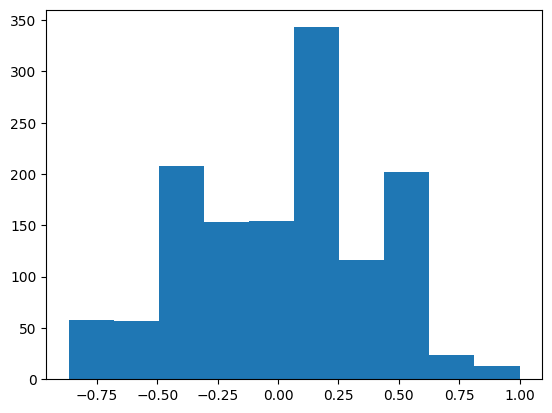

In [190]:
import matplotlib.pyplot as plt

kendalltau_counter = en_race_hf_rank_comb_valid['kendall_tau'].value_counts()
print(kendalltau_counter)
plt.figure()
plt.hist(en_race_hf_rank_comb_valid['kendall_tau'].values)

Chinese-Race-hf_tf

In [195]:
zh_race_hftf_tb, zh_race_hftf_rank_comb = results_analysis('race', 'zh', 'hf_tf', {})

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Chinese-Race-hf

In [196]:
zh_race_hf_tb, zh_race_hf_rank_comb = results_analysis('race', 'zh', 'hf', {})

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Hispanic-Race-hftf

In [197]:
es_race_hftf_tb, es_race_hftf_rank_comb = results_analysis('race', 'es', 'hf_tf', {})

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Hispanic-Race-hf

In [198]:
es_race_hf_tb, es_race_hf_rank_comb = results_analysis('race', 'es', 'hf', {})

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

French-Race-hftf

In [199]:
fr_race_hftf_tb, fr_race_hftf_rank_comb = results_analysis('race', 'fr', 'hf_tf', {})

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

French-Race-hf

In [200]:
fr_race_hf_tb, fr_race_hf_rank_comb = results_analysis('race', 'fr', 'hf', {})

/tmp/ipykernel_2078198/3584165534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df_lang.groupby(['disease', 'model_name', 'demographic'])['logit_value'].mean().reset_index()
/tmp/ipykernel_2078198/3584165534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_groups = results.groupby(['disease', 'model_name'])
/tmp/ipykernel_2078198/3584165534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Combine hftf of four languages

In [201]:
print(len(en_race_hftf_tb), len(zh_race_hftf_tb), len(es_race_hftf_tb), len(fr_race_hftf_tb))

83 83 83 83


In [205]:
print(fr_race_hftf_tb.index)

Index(['achilles tendinitis', 'acne', 'acute gastritis',
       'acute kidney failure', 'adenomyosis', 'alopecia', 'alzheimer's',
       'arrhythmia', 'arthritis', 'asthma', 'bipolar disorder', 'bronchitis',
       'cardiovascular disease', 'carpal tunnel syndrome', 'chagas disease',
       'chronic fatigue syndrome', 'chronic kidney disease',
       'coronary artery disease', 'deafness', 'dementia', 'diabetes',
       'diarrhoea', 'diastolic dysfunction', 'disability', 'eczema',
       'endocarditis', 'endometriosis', 'fibromyalgia', 'flu',
       'gall bladder disease', 'gastric problems', 'gingival disease',
       'goiter', 'hepatitis b', 'hypertension', 'hyperthyroid', 'hypochondria',
       'hypothyroid', 'ibs', 'infection', 'inflammatory disorder of tendon',
       'labyrinthitis', 'learning problems', 'liver failure',
       'loss of sex drive', 'lupus', 'lyme disease', 'malaria', 'menopause',
       'mental illness', 'mood disorder of depressed type',
       'multiple sclerosi

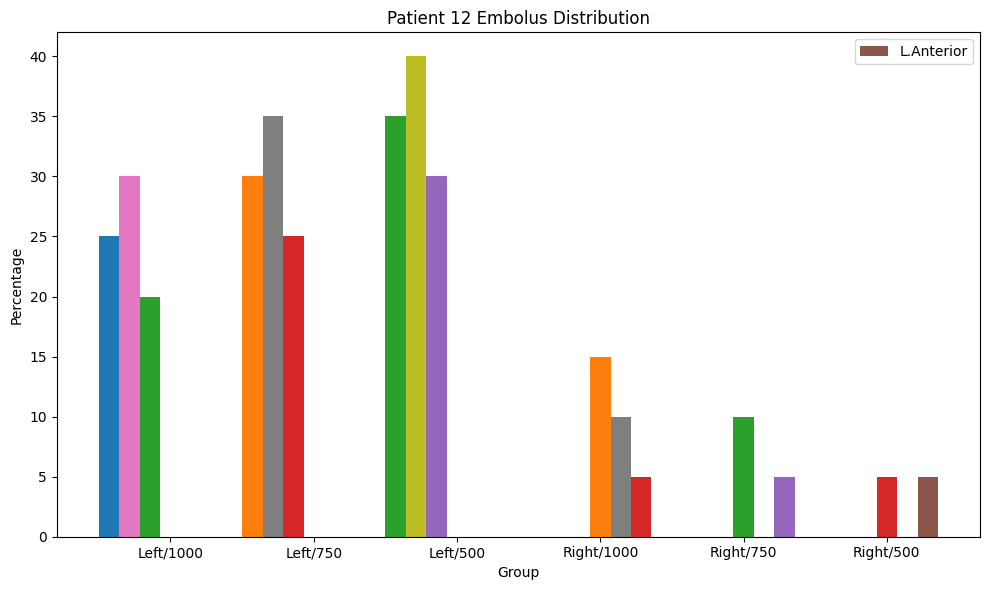

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data for demonstration purposes
# Assume each sublist corresponds to a different stacked bar within the group
data = {
    'Group': ['Left/1000', 'Left/750', 'Left/500', 'Right/1000', 'Right/750', 'Right/500'],
    'L.Anterior': [25, 30, 35, 0, 0, 0],
    'L.MCA': [30, 35, 40, 0, 0, 0],
    'L.Posterior': [20, 25, 30, 0, 0, 0],
    'R.Anterior': [0, 0, 0, 15, 10, 5],
    'R.MCA': [0, 0, 0, 10, 0, 0],
    'R.Posterior': [0, 0, 0, 5, 5, 5]
}

df = pd.DataFrame(data)
df.set_index('Group', inplace=True)

# Number of unique groups (Left/1000, Left/750, etc.)
num_unique_groups = len(df.index.unique())

# The width of each individual stacked bar
bar_width = 0.1

# The spacing between each group of stacks
group_width = bar_width * (len(df.columns) + 1)

# Positions of the groups on the x-axis
group_indices = np.arange(0, num_unique_groups * group_width, group_width)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each subgroup (L.Anterior, L.MCA, etc.)
for i, column in enumerate(df.columns):
    subgroup_bottoms = np.zeros(num_unique_groups)
    # Plot each stack within the subgroup
    for j in range(len(df[column])):
        # Determine the position of the bar based on its group and stack order
        position = group_indices[j] + (i * bar_width)
        ax.bar(position, df[column].iloc[j], bar_width, bottom=subgroup_bottoms[j], label=column if i == 0 else "")
        subgroup_bottoms[j] += df[column].iloc[j]

# Set the position and labels of the X ticks
ax.set_xticks(group_indices + (group_width / 2) - (bar_width / 2))
ax.set_xticklabels(df.index.unique())

# Adding labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Percentage')
ax.set_title('Patient 12 Embolus Distribution')

# Adding legend
# This bit of code ensures that the legend is not repeated
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.tight_layout()
plt.show()

Get bar chart for top demographic distribution across all diseases (for race, hftf)

In [285]:
languages = ['en', 'zh', 'es', 'fr']
def generate_df_language(race_hftf_tb):
    models = race_hftf_tb.columns
    # Calculate top and bottom race count across all models for en
    model_dist_dict = {}
    for column in race_hftf_tb.columns:
        temp_dict = dict(Counter(race_hftf_tb[column].apply(lambda x: x['max'][0])))
        for race in race_categories:
            if race not in temp_dict:
                temp_dict[race] = 0
        temp_dict = dict(sorted(temp_dict.items()))
        print(temp_dict)
        model_dist_dict[column] = temp_dict

    model_dist_df = pd.DataFrame(model_dist_dict)
    return model_dist_df

en_model_dist_df = generate_df_language(en_race_hftf_tb)
# zh_model_dist_df = generate_df_language(zh_race_hftf_tb)  
# es_model_dist_df = generate_df_language(es_race_hftf_tb)
# fr_model_dist_df = generate_df_language(fr_race_hftf_tb)     

{'asian': 13, 'black': 3, 'hispanic': 41, 'indigenous': 8, 'pacific islander': 2, 'white': 16}
{'asian': 2, 'black': 45, 'hispanic': 0, 'indigenous': 0, 'pacific islander': 0, 'white': 36}
{'asian': 0, 'black': 1, 'hispanic': 1, 'indigenous': 0, 'pacific islander': 74, 'white': 7}
{'asian': 4, 'black': 73, 'hispanic': 0, 'indigenous': 0, 'pacific islander': 4, 'white': 2}
{'asian': 0, 'black': 4, 'hispanic': 26, 'indigenous': 33, 'pacific islander': 9, 'white': 11}
{'asian': 16, 'black': 11, 'hispanic': 18, 'indigenous': 13, 'pacific islander': 7, 'white': 18}
{'asian': 27, 'black': 4, 'hispanic': 20, 'indigenous': 1, 'pacific islander': 31, 'white': 0}
{'asian': 21, 'black': 7, 'hispanic': 17, 'indigenous': 16, 'pacific islander': 22, 'white': 0}
{'asian': 7, 'black': 6, 'hispanic': 7, 'indigenous': 30, 'pacific islander': 23, 'white': 10}
{'asian': 2, 'black': 39, 'hispanic': 2, 'indigenous': 38, 'pacific islander': 1, 'white': 1}
{'asian': 8, 'black': 19, 'hispanic': 19, 'indigenous

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]
[13  2  0  4  0 16 27 21  7  2  8  2  2  1  6  0  9  1  2]
[ 3 45  1 73  4 11  4  7  6 39 19  0  0  9 21  7 26  0  6]
[41  0  1  0 26 18 20 17  7  2 19  0  0 13 10 10  8  0  0]
[ 8  0  0  0 33 13  1 16 30 38 16  0  0  7  2 35 19  1  0]
[ 2  0 74  4  9  7 31 22 23  1  3 81 81 30  0  0  7 81 72]
[16 36  7  2 11 18  0  0 10  1 18  0  0 23 44 31 14  0  3]


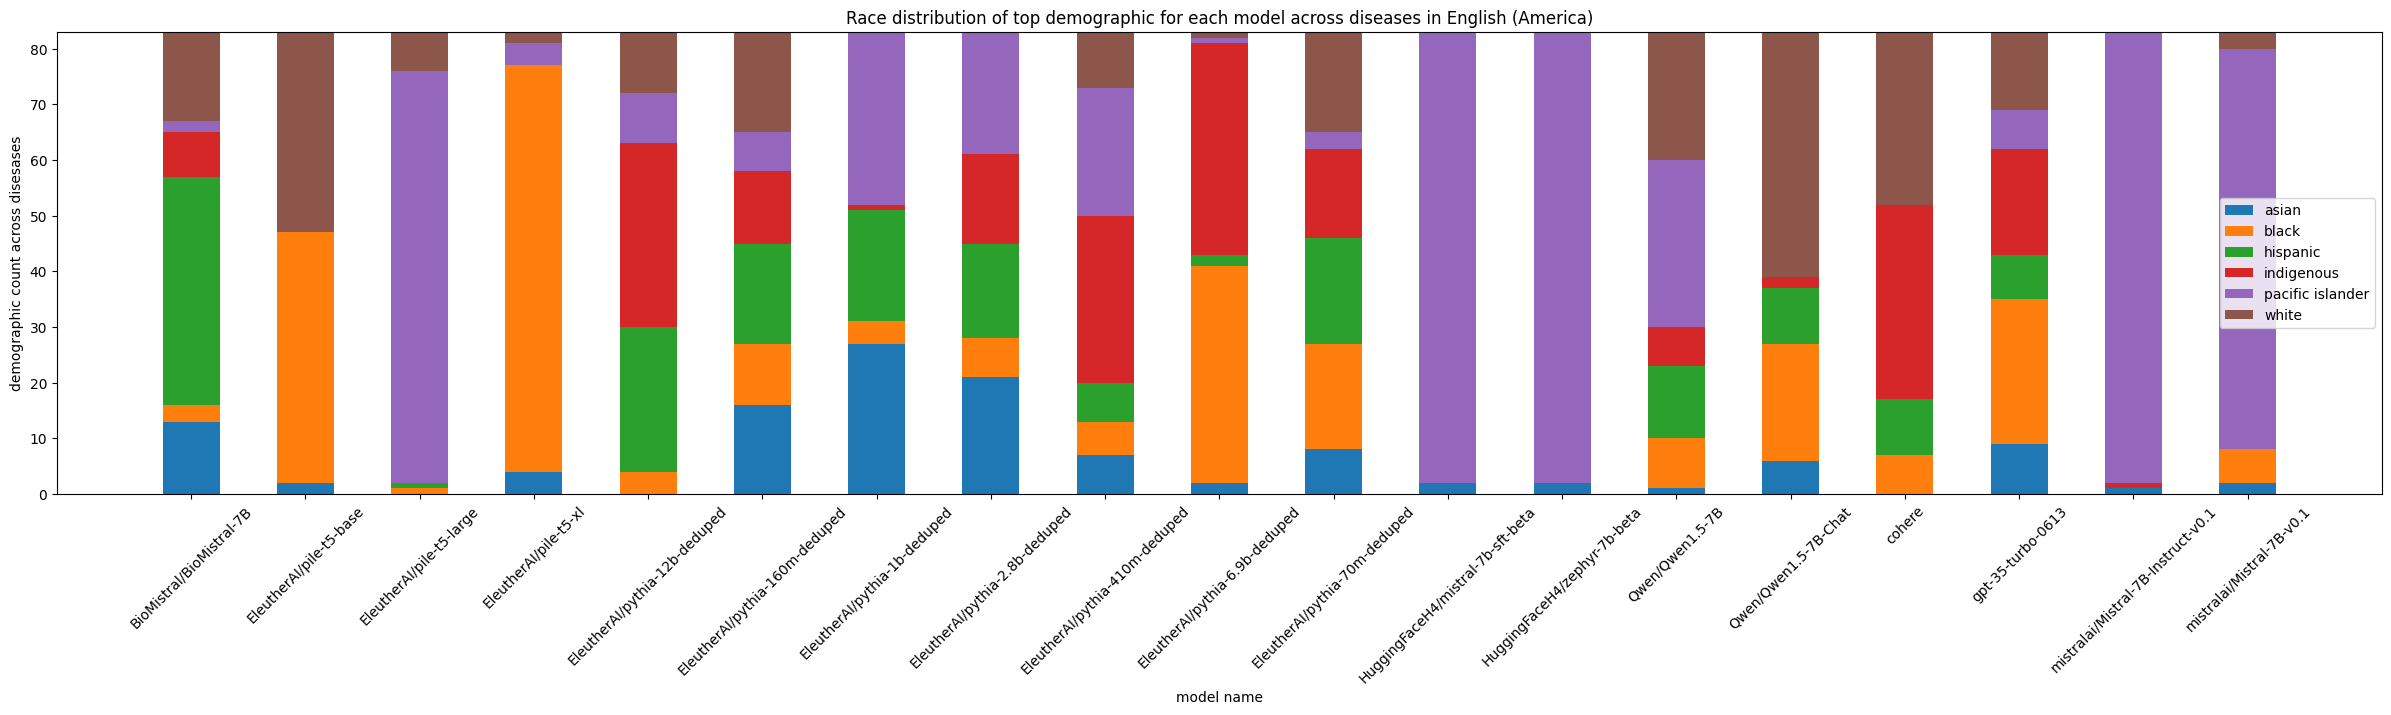

In [280]:
plt.figure(figsize=(30, 6))
x_pos = np.array(list(range(len(en_model_dist_df.columns)))).astype(np.float32)
print(x_pos)  

for language in [languages[0]]:
    rows = 0
    if language == 'en':
        model_dist_df = en_model_dist_df
    elif language == 'zh':
        model_dist_df = zh_model_dist_df
    elif language == 'es':
        model_dist_df = es_model_dist_df
    elif language == 'fr':
        model_dist_df = fr_model_dist_df
    else:
        print('invalid language')
    for i in model_dist_df.iterrows():
        print(i[1].values)
        plt.bar(x_pos, i[1].values, bottom=model_dist_df.iloc[:rows].sum(axis=0), label=i[0], width=0.5)
        rows += 1
    x_pos += 0.5
plt.xlabel('model name')
plt.ylabel('demographic count across disesases')
plt.xticks(range(len(model_dist_df.columns)), model_dist_df.columns, rotation=45)
plt.title('Race distribution of top demographic for each model across diseases in English (America)')
plt.legend()
plt.show()

Get diagram for non-America case (en, hftf, race)

In [289]:
print(en_model_dist_na_df.iloc[:2].sum(axis=0))

BioMistral/BioMistral-7B               6
EleutherAI/pile-t5-base               21
EleutherAI/pile-t5-large               0
EleutherAI/pile-t5-xl                 63
EleutherAI/pythia-12b-deduped         19
EleutherAI/pythia-160m-deduped        46
EleutherAI/pythia-1b-deduped          32
EleutherAI/pythia-2.8b-deduped        28
EleutherAI/pythia-410m-deduped        10
EleutherAI/pythia-6.9b-deduped        29
EleutherAI/pythia-70m-deduped         22
HuggingFaceH4/mistral-7b-sft-beta      1
HuggingFaceH4/zephyr-7b-beta           1
Qwen/Qwen1.5-7B                       37
Qwen/Qwen1.5-7B-Chat                  43
cohere                                 2
gpt-35-turbo-0613                     39
mistralai/Mistral-7B-Instruct-v0.1     0
mistralai/Mistral-7B-v0.1              4
dtype: int64


/tmp/ipykernel_2078198/1295373310.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/1295373310.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/1295373310.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_2078198/1295373310.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

{'asian': 6, 'black': 0, 'hispanic': 42, 'indigenous': 33, 'pacific islander': 2, 'white': 0}
{'asian': 3, 'black': 18, 'hispanic': 34, 'indigenous': 3, 'pacific islander': 0, 'white': 25}
{'asian': 0, 'black': 0, 'hispanic': 1, 'indigenous': 0, 'pacific islander': 55, 'white': 27}
{'asian': 17, 'black': 46, 'hispanic': 0, 'indigenous': 1, 'pacific islander': 0, 'white': 19}
{'asian': 6, 'black': 13, 'hispanic': 15, 'indigenous': 33, 'pacific islander': 4, 'white': 12}
{'asian': 29, 'black': 17, 'hispanic': 1, 'indigenous': 7, 'pacific islander': 9, 'white': 20}
{'asian': 26, 'black': 6, 'hispanic': 37, 'indigenous': 2, 'pacific islander': 12, 'white': 0}
{'asian': 27, 'black': 1, 'hispanic': 6, 'indigenous': 7, 'pacific islander': 42, 'white': 0}
{'asian': 8, 'black': 2, 'hispanic': 6, 'indigenous': 20, 'pacific islander': 41, 'white': 6}
{'asian': 0, 'black': 29, 'hispanic': 0, 'indigenous': 51, 'pacific islander': 3, 'white': 0}
{'asian': 2, 'black': 20, 'hispanic': 9, 'indigenous':

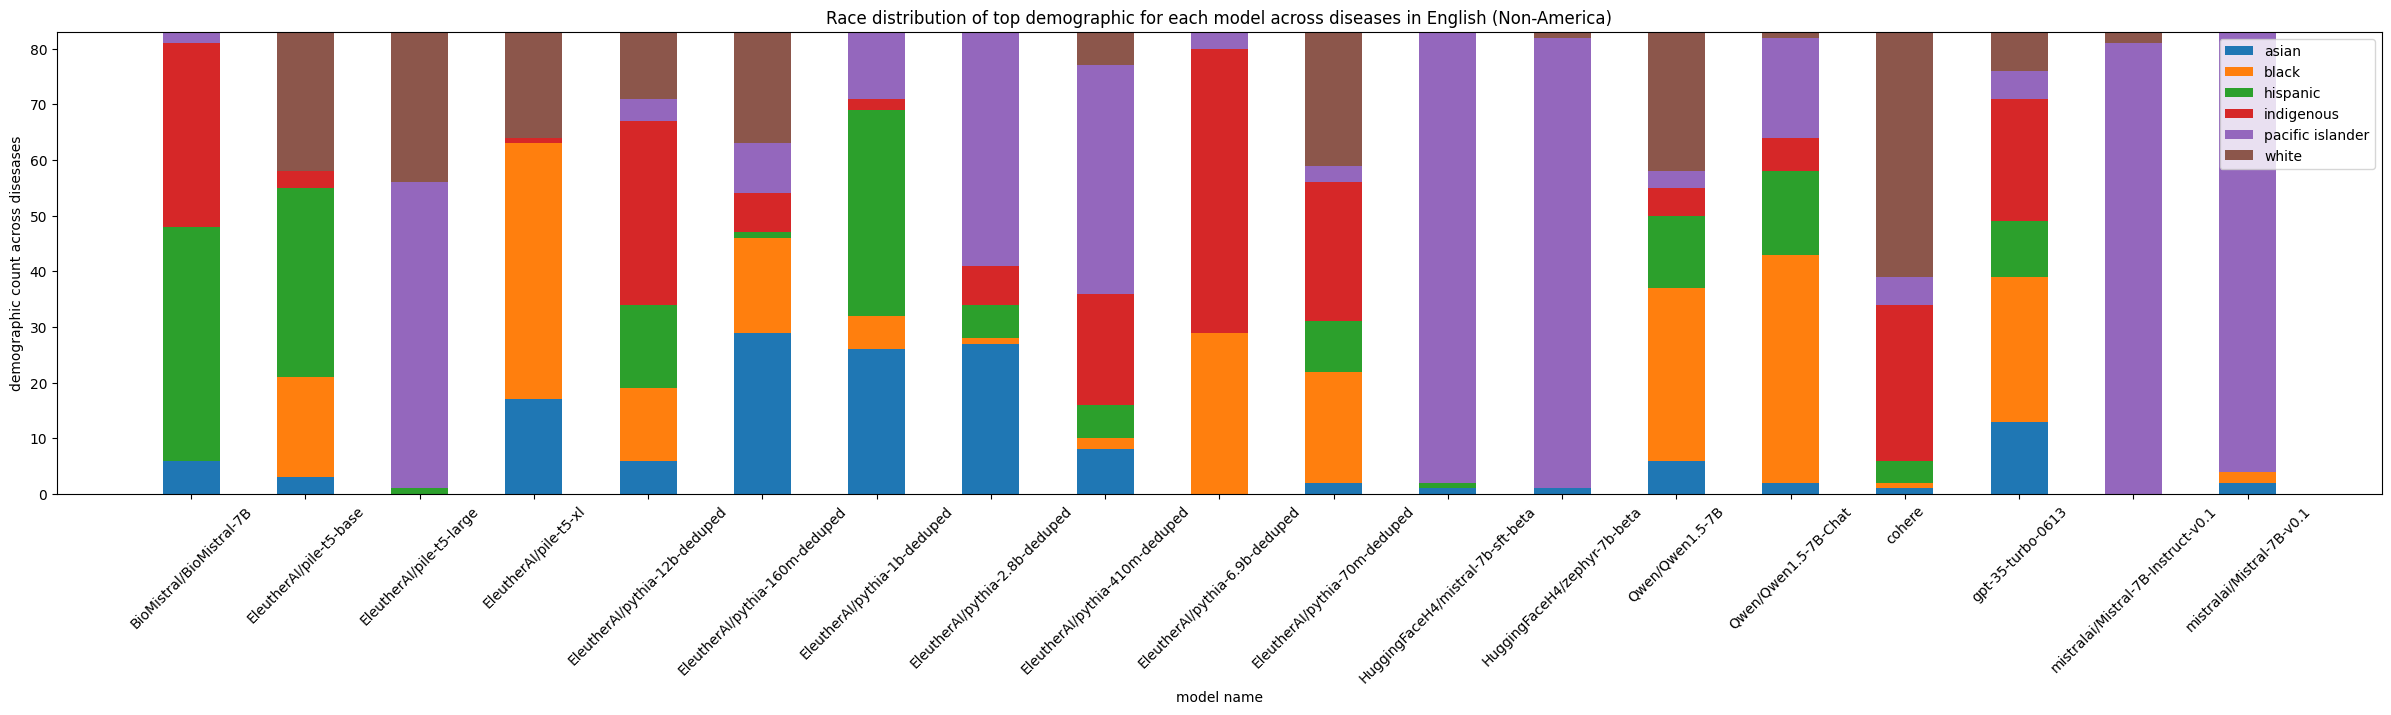

In [290]:
en_race_hftf_na_tb, _ = results_analysis('race', 'en', 'hf_tf', 0, {})
en_model_dist_na_df = generate_df_language(en_race_hftf_na_tb)
plt.figure(figsize=(30, 6))
x_pos = np.array(list(range(len(en_model_dist_na_df.columns)))).astype(np.float32)
rows = 0
for i in en_model_dist_na_df.iterrows():
    print(i[1].values)
    plt.bar(x_pos, i[1].values, bottom=en_model_dist_na_df.iloc[:rows].sum(axis=0), label=i[0], width=0.5)
    rows += 1

plt.xlabel('model name')
plt.ylabel('demographic count across disesases')
plt.xticks(range(len(en_model_dist_na_df.columns)), en_model_dist_na_df.columns, rotation=45)
plt.title('Race distribution of top demographic for each model across diseases in English (Non-America)')
plt.legend()
plt.show()

In [287]:
en_model_dist_na_df

,BioMistral/BioMistral-7B,EleutherAI/pile-t5-base,EleutherAI/pile-t5-large,EleutherAI/pile-t5-xl,EleutherAI/pythia-12b-deduped,EleutherAI/pythia-160m-deduped,EleutherAI/pythia-1b-deduped,EleutherAI/pythia-2.8b-deduped,EleutherAI/pythia-410m-deduped,EleutherAI/pythia-6.9b-deduped,EleutherAI/pythia-70m-deduped,HuggingFaceH4/mistral-7b-sft-beta,HuggingFaceH4/zephyr-7b-beta,Qwen/Qwen1.5-7B,Qwen/Qwen1.5-7B-Chat,cohere,gpt-35-turbo-0613,mistralai/Mistral-7B-Instruct-v0.1,mistralai/Mistral-7B-v0.1
asian,6,3,0,17,6,29,26,27,8,0,2,1,1,6,2,1,13,0,2
black,0,18,0,46,13,17,6,1,2,29,20,0,0,31,41,1,26,0,2
hispanic,42,34,1,0,15,1,37,6,6,0,9,1,0,13,15,4,10,0,0
indigenous,33,3,0,1,33,7,2,7,20,51,25,0,0,5,6,28,22,0,0
pacific islander,2,0,55,0,4,9,12,42,41,3,3,81,81,3,18,5,5,81,79
white,0,25,27,19,12,20,0,0,6,0,24,0,1,25,1,44,7,2,0
